In [8]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import plotting_fxns as plotfxns

This notebook is intended to make plotting of the PyGEM-EB output straightforward for fast diagnostics after a model run. Most functions just need the information for the model run in the cell below. 

In [29]:
# Filepath to the model run output
file = '/home/claire/research/Output/EB/run_2023_09_08_hourly_00.nc'
# Some functions only plot a single elevation bin
bin = 0

Specify the plotting style to use and the figure name to save the plot.

In [30]:
# Define additional plotting variables
style.use('seaborn')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] 
today = str(pd.Timestamp.today()).replace('-','_')[0:10]
figname = 'Figure'+today+'.png'

Run the following cells to plot the data. For information on any of the plotting functions, run 'help(name_of_function)'. Available functions are:
- plot_avgs
- plot_yrs
- plot_avg_layers
- plot_layers_monthly

In [31]:
# Load in the data and define the number of years in the model run
ds = xr.open_dataset(file)
startdate = pd.to_datetime(ds.indexes['time'].to_numpy()[0])
enddate = pd.to_datetime(ds.indexes['time'].to_numpy()[-1])
nyr = enddate.year-startdate.year

In [39]:
ds = xr.open_dataset('/home/claire/research/Output/EB/run_2023_09_08_hourly_2.nc').sel(bin=0)
print(ds['LWin'])

<xarray.DataArray 'LWin' (time: 745)>
array([0., 0., 0., ..., 0., 0., 0.])
Coordinates:
  * time     (time) datetime64[ns] 2015-05-01 2015-05-01T01:00:00 ... 2015-06-01
    bin      int64 0
Attributes:
    units:    W m-2


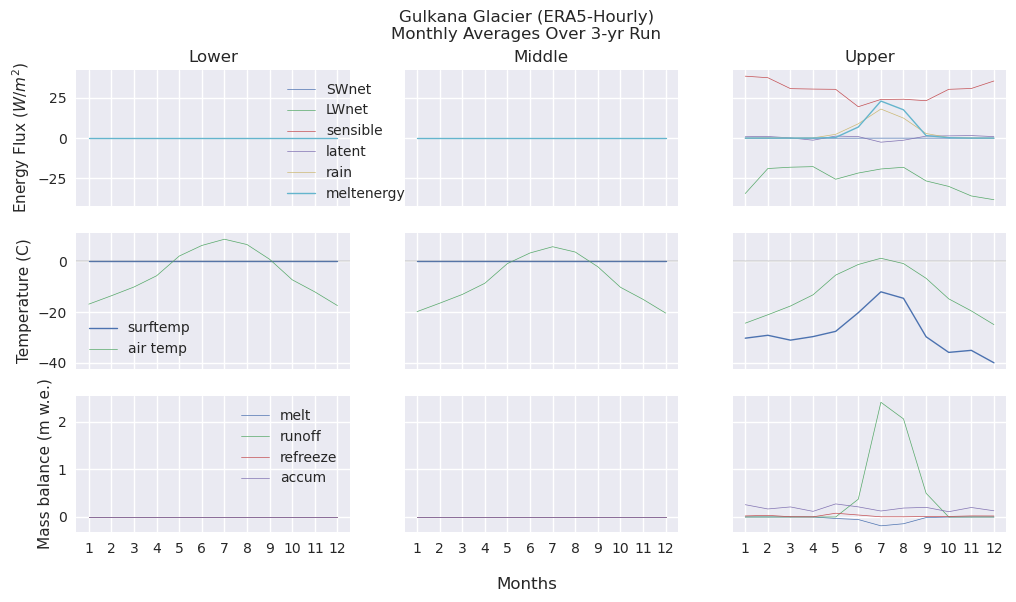

In [32]:
months_to_plot = np.int64(np.linspace(0,11,5))
# plotfxns.plot_layers_monthly(file,'layertemp',months_to_plot,colors)
plotfxns.plot_avgs(file,nyr)

In [13]:
ds = xr.open_dataset(file)
print(ds.melt.sel(bin=0).values)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.08152039e-18
 1.85946900e-18 6.53042942e-19]


In [57]:
fp = '/home/claire/research/PyGEM/pygem_eb/sample_init_data/endaccum_initialTp.nc'
ds = xr.open_dataset(fp)
print(ds.firn_depth)

<xarray.DataArray 'firn_depth' (bin_elev: 3)>
array([0, 0, 2])
Coordinates:
  * bin_elev  (bin_elev) float64 1.134e+03 1.381e+03 1.741e+03


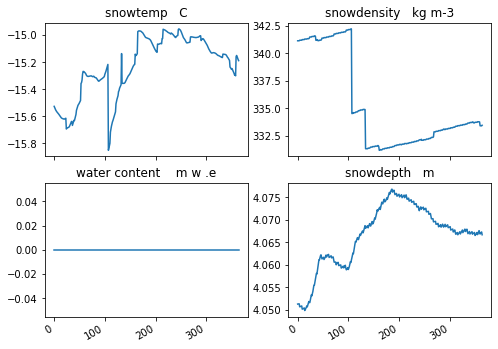

In [55]:
plot_avg_layers(file,bin,nyr)

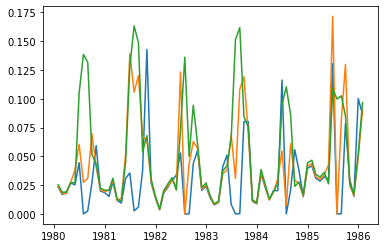

In [63]:
ds = xr.open_dataset(file)
accum = ds['accum'].to_pandas()
accum = accum.resample('M').mean()*1000
plt.plot(accum.index,accum)
plt.show()

In [107]:
import xarray as xr
ds = xr.open_dataset('/home/claire/research/climate_data/ERA5/ERA5_hourly/ERA5_precip_hourly.nc')
print(np.mean(ds['tp'].values),np.max(ds['tp'].values))
print(np.sum(ds['tp'].values[:8790]))

9.609282174515584e-05 0.004886787384748459


In [ ]:
# def plot_diurnal(file,bin):
ds = xr.open_dataset(file)
fig,axes = plt.subplots(2,2,sharey=True,sharex=True,figsize=(8,4)) #,sharex=True,sharey='row'
df = ds['snowdepth'].to_pandas()